# Librerias

In [1]:
'''Librerias correspondientes para el algoritmo Árbol de Decisión, definiciones de las librerías visita el siguiente enlace: https://docs.python.org/es/3.8/tutorial/index.html'''
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from six import StringIO
from IPython.display import Image
import pydotplus
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset

In [2]:
'''Carga del dataset Diabetes mediante la libreía Pandas '''
df = pd.read_csv('Diabetes.csv')
'''Lectura del encabezado del dataset Diabetes '''
df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [3]:
'''Verificación de los datos existentes en la columna Gender'''
df.groupby('Gender').size()

Gender
F    434
M    565
f      1
dtype: int64

In [4]:
'''Verificación de los datos existentes en la columna CLASS'''
df.groupby('CLASS').size()

CLASS
N     102
N       1
P      53
Y     840
Y       4
dtype: int64

## Modificación del Dataset
Se modifica el dataset en el caso de la columna Gender sustituir la letra f por F
y en el caso de la columna CLASS agrupar las N y Y que estan repetidas

In [5]:
'''Reemplazo de la f por la F'''
df['Gender'] = df['Gender'].replace('f','F')
'''Verificación del reemplazo en la columna Gender'''
df.groupby('Gender').size()

Gender
F    435
M    565
dtype: int64

In [6]:
'''Reemplazo de las letras N y Y para que conformen una sola letra'''
df['CLASS'] = df['CLASS'].replace('N ','N')
df['CLASS'] = df['CLASS'].replace('Y ','Y')
'''Verificación del reemplazo en la columna Gender'''
df.groupby('CLASS').size()

CLASS
N    103
P     53
Y    844
dtype: int64

In [7]:
'''Dataset listo para el desarrollo del algoritmo de árbol de decisión'''
df

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,200,454317,M,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,Y
996,671,876534,M,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,Y
997,669,87654,M,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,Y
998,99,24004,M,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,Y


# Reemplazo de valores
Se reemplazan los caracteres por números

In [8]:
'''Mapeo de caracteristicas con valores numéricos de la columna gender'''
d1 = {'F': 0, 'M': 1}
df['Gender'] = df['Gender'].map(d1)

'''Mapeo de etiquetas con valores numéricos de la columna CLASS'''
d2 = {'N': 0, 'P': 1, 'Y': 2}
df['CLASS'] = df['CLASS'].map(d2)

In [9]:
'''Verificación del Dataset con valores cambiados'''
df

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,735,34221,1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0
2,420,47975,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
3,680,87656,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
4,504,34223,1,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,200,454317,1,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,2
996,671,876534,1,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,2
997,669,87654,1,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,2
998,99,24004,1,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,2


# Designación de características o entradas y etiqueta o salida

### Características

In [10]:
'''Características seleccionadas para el modelamiento'''
features = ['Gender', 'AGE', 'Urea','Cr','HbA1c', 'Chol', 'TG','HDL','LDL', 'VLDL', 'BMI']
'''Asignación de variable para las características'''
X = df[features]
'''Verficación de caracteristicas'''
X

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
0,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0
1,1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0
2,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0
3,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0
4,1,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0
...,...,...,...,...,...,...,...,...,...,...,...
995,1,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0
996,1,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2
997,1,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4
998,1,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5


### Etiqueta

In [11]:
'''Asignación de variable para la etiqueta''' 
y = df.CLASS
'''Verficación de las etiquetas'''
y

0      0
1      0
2      0
3      0
4      0
      ..
995    2
996    2
997    2
998    2
999    2
Name: CLASS, Length: 1000, dtype: int64

# Clasificación con algoritmo Árbol de Decisión

In [12]:
''''Contrucción de un clasificador de árbol de decisión'''
clf = DecisionTreeClassifier()

## División del conjunto de datos

In [13]:
'''División del modelo con 70% de entrenamiento y 30% para el tamaño de la prueba,
El estado aleatorio es 1'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## Entrenamiento del modelo

In [14]:
'''Proporcionando el conjunto de datos de entrenamiento'''
clf = clf.fit(X_train, y_train)

## Predicción del modelo

In [15]:
'''Asignación de variable para las predicciones del algoritmo'''
y_pred = clf.predict(X_test)

# Métricas del algoritmo
Con las métricas asociadas se puede evaluar eficazmente el modelo de clasificación DecisionTree, lo cual es esencial para entenderlo. Se encuentra TP, TN, FP y FN para cada clase individual y calcula la precisión, recuerdo y F1. 

In [16]:
'''Claculo de la preción del algoritmo'''
print('Precisión: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))
'''Reporte de clasificación para verificar las métricas del algoritmo'''
print(classification_report(y_test, y_pred, target_names=['CLASS N', 'CLASS P', 'CLASS Y']))

Precisión: 0.97

              precision    recall  f1-score   support

     CLASS N       0.83      0.91      0.87        32
     CLASS P       1.00      0.81      0.90        16
     CLASS Y       0.98      0.98      0.98       252

    accuracy                           0.97       300
   macro avg       0.94      0.90      0.92       300
weighted avg       0.97      0.97      0.97       300



# Graficar Arbol de Decision
Se traza el árbol para ver su raíz, ramas y nodos utilizando las siguientes funciones:
* **StringIO()**: crea un objeto (vacío en este caso) para recibir un buffer de cadena (el árbol se creará primero como cadena antes que como imagen) en formato DOT (graph description language).
* **export_graphviz()**: esta función exporta el árbol en formato DOT, generando una representación del árbol de decisión, que se escribe en el archivo 'out_file'.
* **graph_from_dot_data()**: utilizará el objeto DOT para crear el gráfico.
* **Image()**: utiliza los datos en bruto para devolver una imagen (png).

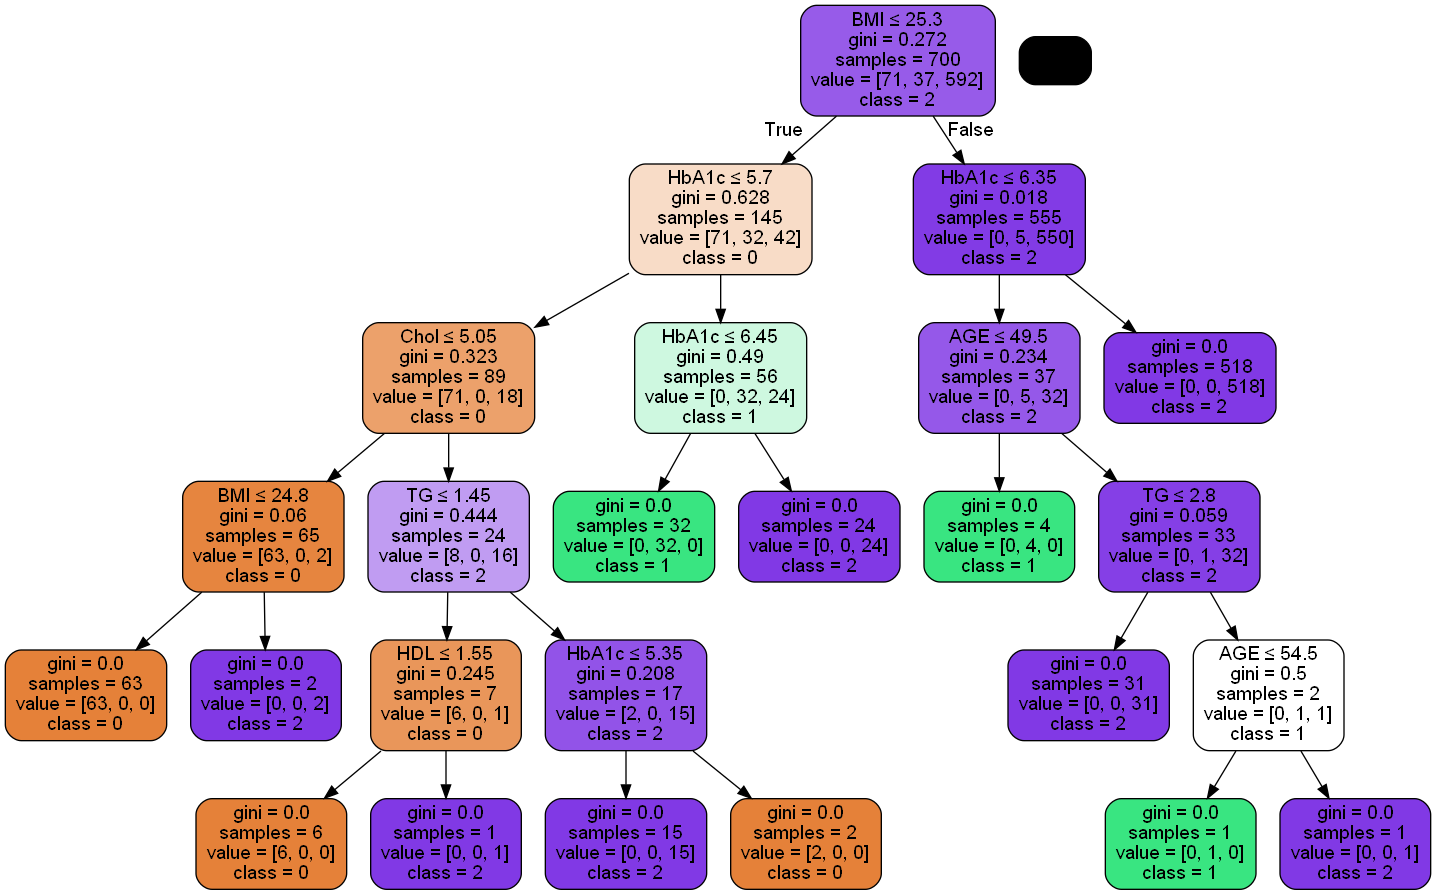

In [17]:
'''Visvualización del árbol de decisiones'''
'''Construcción de cadenas'''
dot_data = StringIO()
'''GraphViz del árbol de decisiones para visualizar gráfico png '''
export_graphviz(clf, out_file = dot_data,
              filled = True, rounded = True,
              special_characters = True,
              feature_names = features,
              class_names = ['0', '1','2'])
'''Gráfico de carga definido por los datos en formato DOT'''
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
'''Creación de gráfico PNG'''
graph.write_png('diabetes_arbolcompleto.png')
'''Muestra la imagen generada en formato png'''
Image(graph.create_png())

## Poda
Podar/acortar un árbol es esencial para facilitar la comprensión del resultado y optimizarlo. Esta optimización puede hacerse de tres maneras:

* **criterion**: Elegir medida de selección de atributos

Define qué función se utilizará para medir la calidad de una división. Las opciones son "gini" y "entropía". La relación Gini mide la impureza del nodo en un árbol de decisión. Se puede asumir que un nodo es puro cuando todos sus registros pertenecen a la misma clase.

* **max_depth**: Profundidad máxima de un árbol

Define la profundidad máxima del árbol. Si es None, el árbol será lo más largo posible, cuando todas las hojas sean puras (riesgo de sobreajuste del modelo).

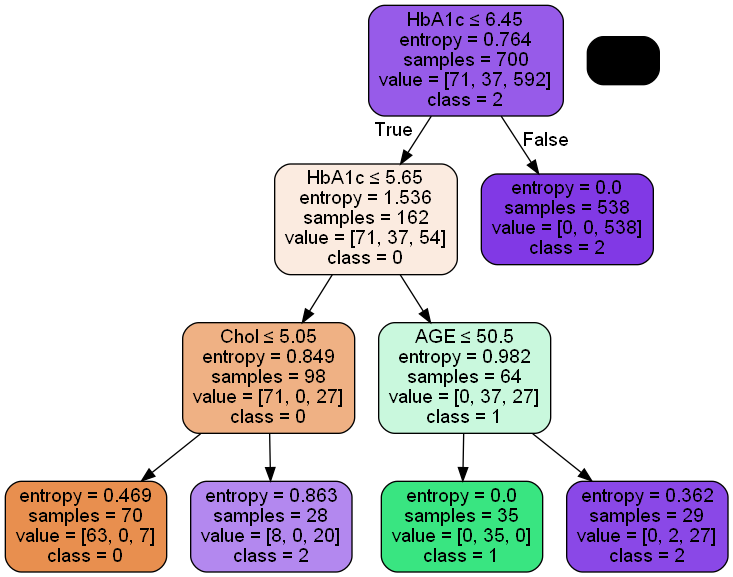

In [18]:
'''Podado del árbol con entropía lo cual significa ganancia de información 
árbol de decisión con valores de profundidad máxima de 3'''
clf = DecisionTreeClassifier(criterion="entropy",max_depth=3)

'''Proporcionar el conjunto de datos de entrenamiento'''
clf = clf.fit(X_train, y_train)
'''Asignación de variable para la predicción del algoritmo'''
y_pred = clf.predict(X_test)

'''Construcción de cadenas'''
dot_data = StringIO()
'''GraphViz del árbol de decisiones para visualizar gráfico png '''
export_graphviz(clf, out_file = dot_data,
              filled = True, rounded = True,
              special_characters = True,
              feature_names = features,
              class_names = ['0', '1','2'])
'''Gráfico de carga definido por los datos en formato DOT'''
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
'''Creación de gráfico PNG'''
graph.write_png('diabetes_arbolpodado.png')
'''Muestra la imagen generada en formato png'''
Image(graph.create_png())